In [1]:
!pip install sklearn
!pip install tensorflow

In [2]:
# fashion_mnist
# 데이터 추출을 하는데
# Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.datasets import fashion_mnist
(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9

random_idx = np.random.randint(60000, size=sample_size)

x_train = np.reshape(x_train / 255, (-1, 28, 28, 1))
x_test = np.reshape(x_test / 255, (-1, 28, 28, 1))

from tensorflow.keras.utils import to_categorical

t_train = to_categorical(t_train)
t_test = to_categorical(t_test)

from sklearn.model_selection import train_test_split

x_train, x_val, t_train, t_val = train_test_split(x_train, t_train,
                                                 test_size = 0.3,
                                                 random_state=777)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

model = Sequential([
    Conv2D(filters=16, kernel_size=3, padding='same',
          activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
    
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(x_train, t_train, epochs=30, batch_size=128, validation_data=(x_val, t_val))

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 11s 261us/sample - loss: 0.6770 - acc: 0.7588 - val_loss: 0.4642 - val_acc: 0.8211
Epoch 2/30
42000/42000 [==============================] - 11s 250us/sample - loss: 0.4100 - acc: 0.8522 - val_loss: 0.3614 - val_acc: 0.8746
Epoch 3/30
42000/42000 [==============================] - 11s 251us/sample - loss: 0.3527 - acc: 0.8718 - val_loss: 0.3417 - val_acc: 0.8771
Epoch 4/30
42000/42000 [==============================] - 11s 255us/sample - loss: 0.3184 - acc: 0.8858 - val_loss: 0.3203 - val_acc: 0.8884
Epoch 5/30
42000/42000 [==============================] - 11s 254us/sample - loss: 0.2925 - acc: 0.8933 - val_loss: 0.2984 - val_acc: 0.8953
Epoch 6/30
42000/42000 [==============================] - 11s 252us/sample - loss: 0.2727 - acc: 0.9012 - val_loss: 0.2841 - val_acc: 0.8991
Epoch 7/30
42000/42000 [==============================] - 11s 254us/sample - loss: 0.2564 - acc: 0.9050 

In [3]:
!pip install opencv-python

output의 크기: 25


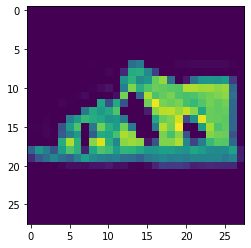

In [4]:

import cv2
# model.add(Dense(128, activation='relu'), input_shape=(784,))
# ->파라미터의 수 : 100,480개. 128개의 은닉층

#model.add(Conv2D(filters=1000, kernel_size=3,padding='same',
#          activation='relu', input_shape=(28, 28, 1)))

# -> 파라미터수 : 1280개, 1000개의 합성곱 필터
plt.imshow(x_train[0])

horizontal_filter = np.array([[1., 2., 1.],
                            [0., 0., 0.],
                            [-1., -2., -1.]])

vertical_filter = np.array([[1., 0., -1.],
                          [2., 0., 2.],
                          [1., 0., -1.]])

test_image = cv2.resize(x_train[0], (27, 27))
image_size = test_image.shape[0]
output_size = int((image_size - 3) / 1 + 1)
print('output의 크기: %d' % output_size)
